In [3]:
import sys
import os
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

=== Top 20 Keywords/Phrases ===


,Keyword/Phrase,Frequency
0,stocks,19513
1,shares,17029
2,trading,15108
3,price,12315
4,companies,11870
5,several,11721
6,target,11554
7,price target,11294
8,shares several,11128
9,companies trading,10244


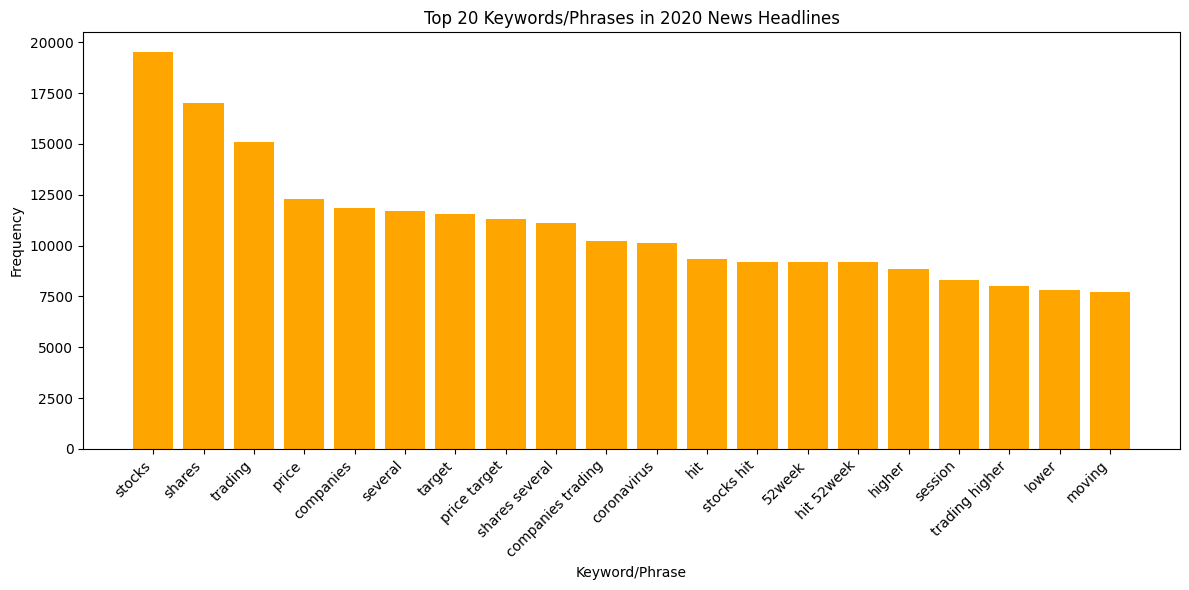


=== Identified Topics ===
Topic 1: Topic 1: says, coronavirus, reports, biotech, new, daily, pulse, company, shares, announces
Topic 2: Topic 2: shares, trading, companies, higher, lower, coronavirus, amid, economic, biggest, oil
Topic 3: Topic 3: 2020, earnings, update, downgrades, upgrades, benzingas, market, biotech, march, april
Topic 4: Topic 4: stocks, hit, 52week, session, moving, lows, premarket, highs, thursday, friday
Topic 5: Topic 5: price, target, maintains, sales, estimate, eps, lowers, raises, buy, neutral

=== Topic Assignments (Sample) ===


,headline,Dominant_Topic,Topic_Probability
0,Stocks That Hit 52Week Highs On Friday,3,0.866666
1,Stocks That Hit 52Week Highs On Wednesday,3,0.866664
2,71 Biggest Movers From Friday,1,0.550000
3,46 Stocks Moving In Fridays MidDay Session,3,0.866666
4,B of A Securities Maintains Neutral on Agilent...,4,0.910978
5,CFRA Maintains Hold on Agilent Technologies Lo...,4,0.910973
6,UBS Maintains Neutral on Agilent Technologies ...,4,0.910978
7,Agilent Technologies shares are trading higher...,4,0.360057
8,Wells Fargo Maintains Overweight on Agilent Te...,4,0.919895
9,10 Biggest Price Target Changes For Friday,4,0.369272


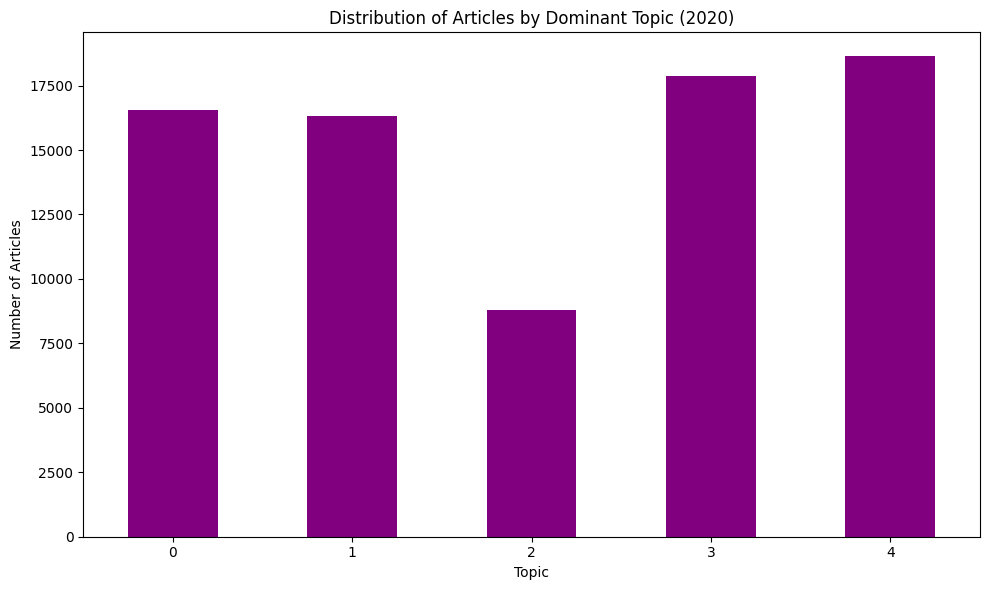

In [4]:
# ---
# title: Topic Modeling for 2020 Financial News Dataset
# description: Notebook to perform text analysis using NLP to extract keywords and identify topics
# ---

# ### 1. Download NLTK Resources
# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Download NLTK resources
try:
    nltk.download('punkt_tab', quiet=True)
    nltk.download('stopwords', quiet=True)
except Exception as e:
    print(f"Error downloading NLTK resources: {e}")
    raise

from src.nlp_utils import extract_keywords, run_topic_modeling

# ### 2. Load Cleaned News Dataset
news_columns = ['headline', 'publisher_domain', 'date', 'date_only', 'stock']
news_df = pd.read_csv('../data/fnspid_news_cleaned_2020.csv')
for col in news_columns:
    if col not in news_df.columns:
        raise ValueError(f"Missing column: {col}")

# Convert date_only to datetime
news_df['date_only'] = pd.to_datetime(news_df['date_only'])

# ### 3. Extract Keywords
keywords_df = extract_keywords(news_df, text_column='headline', top_n=20)
print("=== Top 20 Keywords/Phrases ===")
display(keywords_df)

# Visualize top keywords
plt.figure(figsize=(12, 6))
plt.bar(keywords_df['Keyword/Phrase'], keywords_df['Frequency'], color='orange')
plt.title('Top 20 Keywords/Phrases in 2020 News Headlines')
plt.xlabel('Keyword/Phrase')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plots/keyword_frequency_2020.png')
plt.show()

# ### 4. Run Topic Modeling
topics, topic_df = run_topic_modeling(news_df, text_column='headline', num_topics=5)
print("\n=== Identified Topics ===")
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {topic}")

print("\n=== Topic Assignments (Sample) ===")
display(topic_df.head(10))

# Visualize topic distribution
topic_counts = topic_df['Dominant_Topic'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Articles by Dominant Topic (2020)')
plt.xlabel('Topic')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('plots/topic_distribution_2020.png')
plt.show()

# ### 5. Save Results
keywords_df.to_csv('../data/keywords_2020.csv', index=False)
topic_df.to_csv('../data/topic_assignments_2020.csv', index=False)